In [1]:
import matplotlib.pyplot as plt
import psycopg2 as pg2
from stat_func import r_coefficient, y_int_regression_line, slope_regression_line
import numpy as np
db_conn = pg2.connect(database='AnimeTables', user='postgres', password='password')
db_curr = db_conn.cursor()

In [2]:
db_curr.execute("""SELECT rating, AVG(score) FROM anime2023
                   GROUP BY rating;""")
data = db_curr.fetchall()
data

[('r', Decimal('6.9450464396284830')),
 ('rx', Decimal('6.1079671457905544')),
 (None, Decimal('6.1099009900990099')),
 ('g', Decimal('5.9339016555473190')),
 ('r+', Decimal('6.2395210727969349')),
 ('pg', Decimal('6.3471483622350674')),
 ('pg_13', Decimal('6.7052073015423801'))]

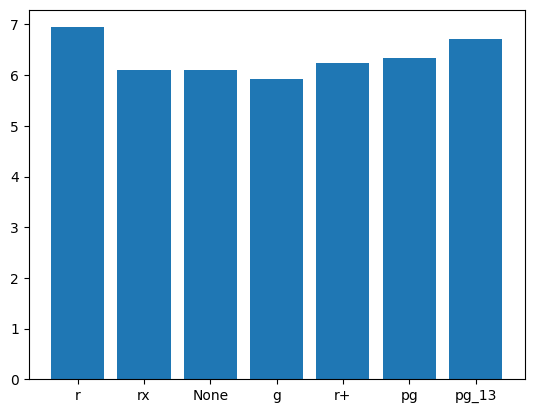

In [3]:
plt.bar([str(rating) for rating, _ in data], [avg for _, avg in data])
plt.show()

In [4]:
db_curr.execute("""SELECT episodes, AVG(score) FROM anime2023
WHERE episodes IS NOT NULL AND score IS NOT NULL
GROUP BY episodes
ORDER BY episodes""")
data = db_curr.fetchall()
data = [(int(x), float(y)) for x, y in data]

data

[(1, 6.16510190488877),
 (2, 6.257659894657637),
 (3, 6.266806020066889),
 (4, 6.397295454545454),
 (5, 6.261726618705036),
 (6, 6.499692307692308),
 (7, 6.525384615384615),
 (8, 6.462241379310345),
 (9, 6.326206896551724),
 (10, 6.506382978723404),
 (11, 7.081382113821138),
 (12, 6.747085978072707),
 (13, 6.869475032010243),
 (14, 6.843055555555556),
 (15, 6.599268292682927),
 (16, 6.587733333333333),
 (17, 6.92875),
 (18, 6.437368421052631),
 (19, 6.69),
 (20, 6.545660377358491),
 (21, 6.980952380952381),
 (22, 7.075625),
 (23, 6.809583333333333),
 (24, 7.0819117647058825),
 (25, 7.1951813471502595),
 (26, 6.870123966942149),
 (27, 6.7615384615384615),
 (28, 6.819),
 (29, 6.597),
 (30, 6.5503846153846155),
 (31, 6.75),
 (32, 6.254375),
 (33, 6.539),
 (34, 6.778888888888889),
 (35, 6.825294117647059),
 (36, 6.477777777777778),
 (37, 6.751176470588235),
 (38, 6.716153846153846),
 (39, 6.911125),
 (40, 6.675227272727272),
 (41, 6.6425),
 (42, 6.963636363636364),
 (43, 7.062777777777778)

Correlation significance: -0.26330268930905276
Significant: False
Best fit intercept: 6.963686721407553
Best fit slope: -0.0004367043226112523


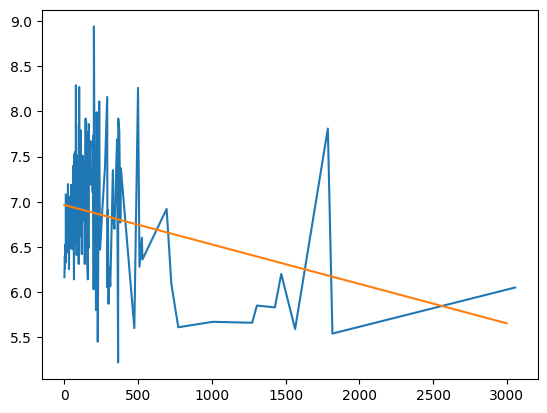

In [5]:
correlation = r_coefficient(data)
significant = correlation <= -0.666 or correlation >= 0.666
best_int = y_int_regression_line(data)
best_slope = slope_regression_line(data)

print(f'Correlation significance: {correlation}\n'
      f'Significant: {significant}\n'
      f'Best fit intercept: {best_int}\n'
      f'Best fit slope: {best_slope}')

def func(x_):
    return x_ * best_slope + best_int

x = np.linspace(0, 3000, num=10000)
y = func(x)

plt.plot([x__ for x__, _ in data], [y__ for _, y__ in data])
plt.plot(x, y)
plt.show()

In [6]:
query = """SELECT score,
       avg(EXTRACT(DAYS FROM total_duration::INTERVAL)),
       avg(EXTRACT(HOURS FROM total_duration::INTERVAL)),
       avg(EXTRACT(MINUTES FROM total_duration::INTERVAL)),
       avg(EXTRACT(SECONDS FROM total_duration::INTERVAL))
FROM anime2023
WHERE total_duration IS NOT NULL AND score IS NOT NULL
GROUP BY score
ORDER BY AVG(total_duration::interval);"""
db_curr.execute(query)
data = []
for score, days, hours, minutes, seconds in db_curr.fetchall():
    show_duration = days * 86400 + hours * 3600 + minutes * 60 + seconds
    data.append((int(show_duration), float(score)))

data

[(7, 2.65),
 (10, 3.13),
 (15, 3.83),
 (25, 3.33),
 (40, 2.32),
 (57, 3.01),
 (60, 2.77),
 (60, 3.72),
 (60, 3.6),
 (69, 4.39),
 (72, 3.53),
 (81, 3.22),
 (90, 3.5),
 (93, 4.22),
 (93, 3.35),
 (95, 3.97),
 (95, 3.78),
 (114, 4.55),
 (131, 4.06),
 (133, 2.76),
 (145, 3.82),
 (145, 2.6),
 (162, 4.36),
 (165, 4.44),
 (166, 4.26),
 (176, 3.32),
 (178, 4.34),
 (185, 3.69),
 (187, 4.13),
 (188, 3.79),
 (194, 4.14),
 (205, 1.99),
 (235, 3.68),
 (240, 3.39),
 (255, 2.96),
 (260, 3.1),
 (260, 3.19),
 (276, 4.19),
 (284, 4.02),
 (289, 4.25),
 (293, 3.9),
 (298, 3.91),
 (300, 4.21),
 (324, 3.57),
 (344, 3.98),
 (347, 3.36),
 (360, 3.16),
 (360, 3.46),
 (361, 3.58),
 (375, 2.4),
 (424, 3.0),
 (429, 4.45),
 (454, 4.2),
 (461, 3.89),
 (481, 4.84),
 (494, 4.4),
 (496, 4.94),
 (543, 4.49),
 (551, 3.63),
 (559, 4.69),
 (579, 4.18),
 (579, 4.23),
 (599, 4.37),
 (600, 4.52),
 (609, 4.54),
 (638, 4.43),
 (639, 4.64),
 (644, 4.24),
 (645, 4.86),
 (671, 5.01),
 (680, 4.15),
 (702, 3.54),
 (704, 5.2),
 (730,

Correlation significance: 0.6501514248925572
Significant: False
Best fit intercept: 5.26771057187903
Best fit slope: 6.915198173594767e-05


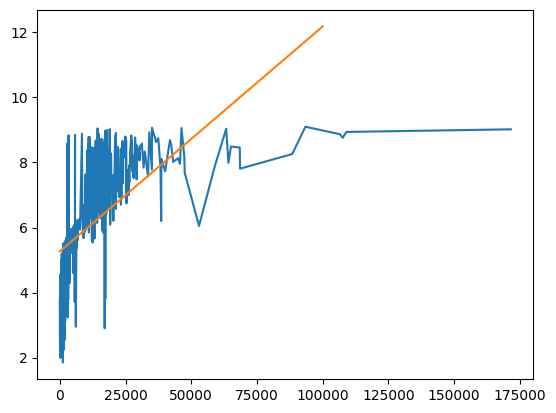

In [8]:
correlation = r_coefficient(data)
significant = correlation <= -0.666 or correlation >= 0.666
best_int = y_int_regression_line(data)
best_slope = slope_regression_line(data)

print(f'Correlation significance: {correlation}\n'
      f'Significant: {significant}\n'
      f'Best fit intercept: {best_int}\n'
      f'Best fit slope: {best_slope}')

def func(x_):
    return x_ * best_slope + best_int

x_input = np.linspace(0, 100000, 10)
y_output = func(x_input)

plt.plot([x for x, _ in data], [y for _, y in data])
plt.plot(x_input, y_output)
plt.show()

In [10]:
query = """SELECT start_season, AVG(score) FROM anime2023
GROUP BY start_season
ORDER BY avg;"""
db_curr.execute(query)
data = [(str(x), float(y)) for x, y in db_curr.fetchall()]
data

[('None', 5.313185185185185),
 ('summer', 6.446826250672404),
 ('winter', 6.4540609278926775),
 ('fall', 6.492564535585042),
 ('spring', 6.512016320084233)]

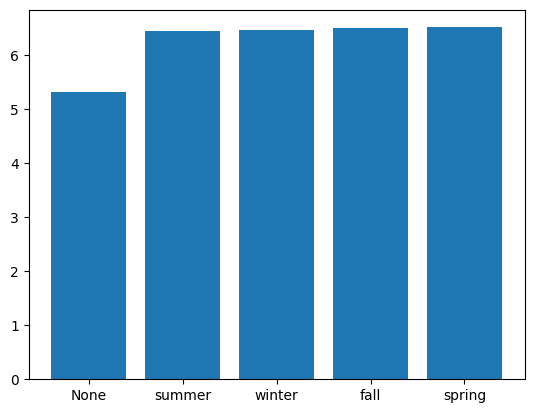

In [11]:
plt.bar([seasons for seasons, _ in data], [score for _, score in data])
plt.show()